## Spectra generation


In [1]:
import multirex as mrex
import matplotlib.pyplot as plt
import numpy as np
import sys
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import joblib
import ast
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
from sklearn.exceptions import DataConversionWarning


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

%matplotlib inline
waves=np.loadtxt("waves.txt")
n_points = len(waves)

In [2]:
def string_to_list(string):
    return ast.literal_eval(string)

CO2_data = pd.read_csv("spec_data/CO2_data.csv")
CO2_data["label"] = CO2_data["label"].apply(string_to_list)
CO2_data["label"] = CO2_data["label"].apply(lambda x: x[1])
CO2_data.data = CO2_data.iloc[:,-n_points:]
CO2_data.params = CO2_data.iloc[:,:-n_points]

CH4_data = pd.read_csv("spec_data/CH4_data.csv")
CH4_data["label"] = CH4_data["label"].apply(string_to_list)
CH4_data["label"] = CH4_data["label"].apply(lambda x: x[1])
CH4_data.data = CH4_data.iloc[:,-n_points:]
CH4_data.params = CH4_data.iloc[:,:-n_points]

O3_data = pd.read_csv("spec_data/O3_data.csv")
O3_data["label"] = O3_data["label"].apply(string_to_list)
O3_data["label"] = O3_data["label"].apply(lambda x: x[1])
O3_data.data = O3_data.iloc[:,-n_points:]
O3_data.params = O3_data.iloc[:,:-n_points]

H2O_data = pd.read_csv("spec_data/H2O_data.csv")
H2O_data["label"] = H2O_data["label"].apply(string_to_list)
H2O_data["label"] = H2O_data["label"].apply(lambda x: x[1])
H2O_data.data = H2O_data.iloc[:,-n_points:]
H2O_data.params = H2O_data.iloc[:,:-n_points]

CH4_O3_data=pd.read_csv("spec_data/CH4_O3_data.csv")
CH4_O3_data["label"] = CH4_O3_data["label"].apply(string_to_list)
CH4_O3_data["label"] = CH4_O3_data["label"].apply(lambda x: x[1])
CH4_O3_data.data = CH4_O3_data.iloc[:,-n_points:]
CH4_O3_data.params = CH4_O3_data.iloc[:,:-n_points]

CH4_H2O_data=pd.read_csv("spec_data/CH4_H2O_data.csv")
CH4_H2O_data["label"] = CH4_H2O_data["label"].apply(string_to_list)
CH4_H2O_data["label"] = CH4_H2O_data["label"].apply(lambda x: x[1])
O3_H2O_data = pd.read_csv("spec_data/O3_H2O_data.csv")
CH4_H2O_data.data = CH4_H2O_data.iloc[:,-n_points:]
CH4_H2O_data.params = CH4_H2O_data.iloc[:,:-n_points]

O3_H2O_data["label"] = O3_H2O_data["label"].apply(string_to_list)
O3_H2O_data["label"] = O3_H2O_data["label"].apply(lambda x: x[1])
O3_H2O_data.data = O3_H2O_data.iloc[:,-n_points:]
O3_H2O_data.params = O3_H2O_data.iloc[:,:-n_points]

CH4_O3_H2O_data = pd.read_csv("spec_data/CH4_O3_H2O_data.csv")
CH4_O3_H2O_data["label"] = CH4_O3_H2O_data["label"].apply(string_to_list)
CH4_O3_H2O_data["label"] = CH4_O3_H2O_data["label"].apply(lambda x: x[1])
CH4_O3_H2O_data.data = CH4_O3_H2O_data.iloc[:,-n_points:]
CH4_O3_H2O_data.params = CH4_O3_H2O_data.iloc[:,:-n_points]

C:\Users\santi\AppData\Local\Temp\ipykernel_13760\1644516167.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CO2_data.data = CO2_data.iloc[:,-n_points:]
C:\Users\santi\AppData\Local\Temp\ipykernel_13760\1644516167.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CO2_data.params = CO2_data.iloc[:,:-n_points]
C:\Users\santi\AppData\Local\Temp\ipykernel_13760\1644516167.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CH4_data.data = CH4_data.iloc[:,-n_points:]
C:\Users\santi\AppData\Local\Temp\ipykernel_13760\1644516167.py:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas

In [3]:
def normalize_min_max_by_row(df):
    min_by_row = df.min(axis=1)
    max_by_row = df.max(axis=1)
    range_by_row = max_by_row - min_by_row
    normalized = (df.sub(min_by_row, axis=0)).div(range_by_row, axis=0)
    normalized[range_by_row == 0] = 0
    return normalized

def plot_confusion_matrix(y_test, y_pred, labels, display_labels, title):
    cm = confusion_matrix(y_test, y_pred, labels=labels, normalize='true')
    fig, ax = plt.subplots(figsize=(8, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(values_format=".0%", colorbar=True, ax=ax)
    disp.im_.colorbar.remove()
    disp.im_.set_clim(0, 1)
    cbar = fig.colorbar(disp.im_, ax=ax)
    cbar.ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.title(title, fontsize=20)

    plt.show()

def remove_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    warnings.filterwarnings(action='ignore', category=DataConversionWarning)    

mix_ratios = np.logspace(-10,-1,10)


## SNR =1



In [4]:
SNR1_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                   n_repeat=5000,
                                   SNR=1)

SNR1_O3 = mrex.generate_df_SNR_noise(df=O3_data,
                                      n_repeat=250,
                                      SNR=1)
SNR1_CO2_O3 = pd.concat([SNR1_CO2,SNR1_O3],ignore_index=True)
SNR1_CO2_O3["label"].value_counts()

label
0    15000
1     7500
Name: count, dtype: int64

## SNR =3



In [5]:
SNR3_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                   n_repeat=5000,
                                   SNR=3)

SNR3_O3 = mrex.generate_df_SNR_noise(df=O3_data,
                                      n_repeat=250,
                                      SNR=3)
SNR3_CO2_O3 = pd.concat([SNR3_CO2,SNR3_O3],ignore_index=True)
SNR3_CO2_O3["label"].value_counts()

label
0    15000
1     7500
Name: count, dtype: int64

## SNR= 6



In [6]:
SNR6_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                      n_repeat=5000,
                                      SNR=6)

SNR6_O3 = mrex.generate_df_SNR_noise(df=O3_data,
                                     n_repeat=500,
                                     SNR=6)

SNR6_CO2_O3 = pd.concat([SNR6_CO2,SNR6_O3],ignore_index=True)
SNR6_CO2_O3["label"].value_counts()


label
0    15000
1    15000
Name: count, dtype: int64

## SNR=10

In [7]:

SNR10_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=5000,
                                        SNR=10)
SNR10_O3 = mrex.generate_df_SNR_noise(df=O3_data,
                                        n_repeat=500,
                                        SNR=10)

SNR10_CO2_O3 = pd.concat([SNR10_CO2,SNR10_O3],ignore_index=True)
SNR10_CO2_O3["label"].value_counts()

label
0    15000
1    15000
Name: count, dtype: int64

## SNR=20


In [8]:
SNR20_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=5000,
                                        SNR=20)

SNR20_O3 = mrex.generate_df_SNR_noise(df=O3_data,
                                        n_repeat=500,
                                        SNR=20)

SNR20_CO2_O3 = pd.concat([SNR20_CO2,SNR20_O3],ignore_index=True)
SNR20_CO2_O3["label"].value_counts()

label
0    15000
1    15000
Name: count, dtype: int64

## SNR=Nan

In [9]:
no_noise_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=10000,
                                        SNR=10000)

no_noise_O3 = mrex.generate_df_SNR_noise(df=O3_data,
                                        n_repeat=1000,
                                        SNR=10000)

no_noise_CO2_O3= pd.concat([no_noise_CO2,no_noise_O3],ignore_index=True)

no_noise_CO2_O3["label"].value_counts()



label
0    30000
1    30000
Name: count, dtype: int64

## All SNR



In [10]:
all_SNR  = pd.concat([SNR1_CO2_O3,SNR3_CO2_O3,SNR6_CO2_O3,SNR10_CO2_O3,SNR20_CO2_O3,no_noise_CO2_O3],ignore_index=True)
all_SNR["label"].value_counts()

label
0    105000
1     90000
Name: count, dtype: int64

In [11]:
all_SNR_train, all_SNR_test = train_test_split(all_SNR, test_size=0.2,)
all_SNR_train.iloc[:,-n_points:] = normalize_min_max_by_row(
    all_SNR_train.iloc[:,-n_points:]
    )
all_SNR_test.iloc[:,-n_points:] = normalize_min_max_by_row(
    all_SNR_test.iloc[:,-n_points:]
    )
all_SNR_X_train = all_SNR_train.iloc[:, -n_points:]
all_SNR_y_train = all_SNR_train["label"].astype(int)
all_SNR_X_test = all_SNR_test.iloc[:, -n_points:]
all_SNR_y_test = all_SNR_test["label"].astype(int)


### rf

In [22]:
all_SNR_rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=200,
    criterion="entropy",
    min_samples_leaf=3,
    n_jobs=-1
                            )

all_SNR_rf.fit(all_SNR_X_train, all_SNR_y_train)
joblib.dump(all_SNR_rf, "O3_rf.joblib")

c:\Users\santi\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\santi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  i

RandomForestClassifier(criterion='entropy', max_depth=200, min_samples_leaf=3,
                       n_estimators=400, n_jobs=-1)

[[20736   202]
 [ 4178 13884]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     20938
           1       0.99      0.77      0.86     18062

    accuracy                           0.89     39000
   macro avg       0.91      0.88      0.88     39000
weighted avg       0.90      0.89      0.89     39000



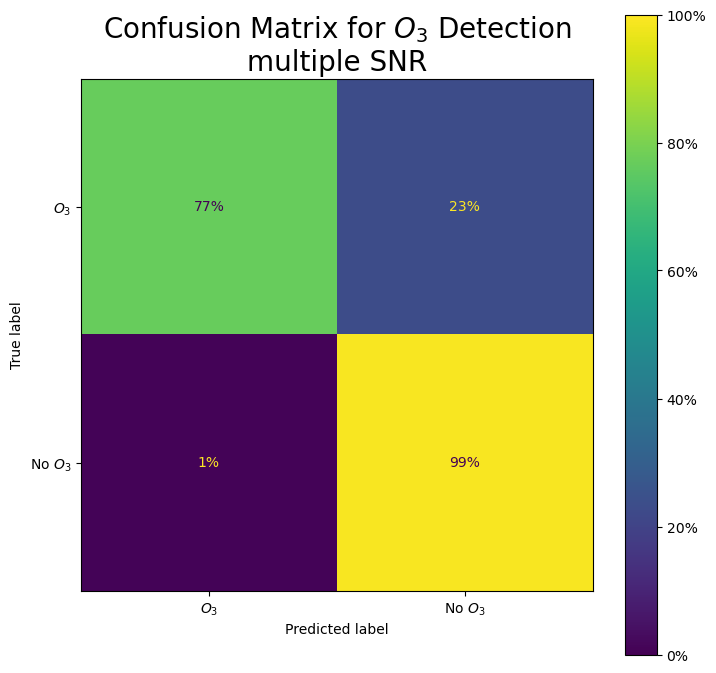

In [13]:
remove_warnings()

all_SNR_probabilites= all_SNR_rf.predict_proba(all_SNR_X_test)[:, 1]
all_SNR_threshold= 0.45
all_SNR_probabilites= (all_SNR_probabilites > all_SNR_threshold).astype(int)
all_SNR_test["pred"] = all_SNR_probabilites
all_SNR_test["score"]= all_SNR_probabilites

print(confusion_matrix(all_SNR_y_test, all_SNR_probabilites))
print(classification_report(all_SNR_y_test, all_SNR_probabilites))

plot_confusion_matrix(
    all_SNR_y_test, all_SNR_probabilites,
    labels=[1,0], display_labels=["$O_3$", "No $O_3$"],
    title="Confusion Matrix for $O_3$ Detection\nmultiple SNR"
)

### scores per mix

In [14]:
all_SNR_test_by_atmO3=[[] for i in range(10)]

for i, j in enumerate(range(-10,-0)):
    all_SNR_test_by_atmO3[i] = all_SNR_test[all_SNR_test["atm O3"]==j]
    co2 = int(len(all_SNR_test[all_SNR_test["label"]==0])/10)
    all_SNR_test_by_atmO3[i] = pd.concat([all_SNR_test_by_atmO3[i],
                                      all_SNR_test[all_SNR_test["label"]==0][i*co2:(i+1)*co2]])
    print(all_SNR_test_by_atmO3[i]["label"].value_counts())
    
    
all_SNR_f1 = np.zeros(len(mix_ratios))
all_SNR_recall = np.zeros(len(mix_ratios))
all_SNR_precision = np.zeros(len(mix_ratios))
all_SNR_score = np.zeros(len(mix_ratios))

for j in range(len(mix_ratios)):
                
                all_SNR_f1[j] = f1_score(
                    all_SNR_test_by_atmO3[j]["label"].astype(int),
                    all_SNR_test_by_atmO3[j]["pred"].astype(int)
                    )
                
                all_SNR_recall[j] = recall_score(
                    all_SNR_test_by_atmO3[j]["label"].astype(int),
                    all_SNR_test_by_atmO3[j]["pred"].astype(int)
                    )
                
                all_SNR_precision[j] = precision_score(
                    all_SNR_test_by_atmO3[j]["label"].astype(int),
                    all_SNR_test_by_atmO3[j]["pred"].astype(int)
                    )
    
                print(f"mix ratio:O3={mix_ratios[j]}")
                print(confusion_matrix(all_SNR_test_by_atmO3[j]["label"].astype(int),
                                    all_SNR_test_by_atmO3[j]["pred"].astype(int)))
                
                print(f"mean score of :O3={mix_ratios[j ]} is {all_SNR_test_by_atmO3[j][all_SNR_test_by_atmO3[j]['label']==1]['score'].mean()}")
                all_SNR_score[j] = all_SNR_test_by_atmO3[j][
                    all_SNR_test_by_atmO3[j]['label']==1
                    ]['score'].mean()

label
0    2093
1    1892
Name: count, dtype: int64
label
0    2093
1    1870
Name: count, dtype: int64
label
0    2093
1    1782
Name: count, dtype: int64
label
0    2093
1    1783
Name: count, dtype: int64
label
0    2093
1    1821
Name: count, dtype: int64
label
0    2093
1    1760
Name: count, dtype: int64
label
0    2093
1    1783
Name: count, dtype: int64
label
0    2093
1    1773
Name: count, dtype: int64
label
0    2093
1    1779
Name: count, dtype: int64
label
0    2093
1    1819
Name: count, dtype: int64
mix ratio:O3=1e-10
[[2067   26]
 [1214  678]]
mean score of :O3=1e-10 is 0.3583509513742072
mix ratio:O3=1e-09
[[2074   19]
 [1222  648]]
mean score of :O3=1e-09 is 0.34652406417112297
mix ratio:O3=1e-08
[[2072   21]
 [ 918  864]]
mean score of :O3=1e-08 is 0.48484848484848486
mix ratio:O3=1e-07
[[2074   19]
 [ 396 1387]]
mean score of :O3=1e-07 is 0.7779024116657319
mix ratio:O3=1e-06
[[2068   25]
 [ 158 1663]]
mean score of :O3=1e-06 is 0.9132344865458539
mix ratio:O3=1e-05

## Validation

In [15]:
SNR = 1

SNRval_all_CO2 = mrex.generate_df_SNR_noise(df=CO2_data,
                                        n_repeat=10000,
                                        SNR=SNR)

SNRval_all_O3 = mrex.generate_df_SNR_noise(df=O3_data,
                                        n_repeat=1000,
                                        SNR=SNR)

SNRval_all_CO2_O3=pd.concat([SNRval_all_CO2,SNRval_all_O3],ignore_index=True)

#SNRval_all_CO2_O3=SNRval_all_CO2_O3[SNRval_all_CO2_O3["atm temperature"]==200]
SNRval_all_CO2_O3["label"].value_counts()



label
0    30000
1    30000
Name: count, dtype: int64

In [16]:
SNRval_all_test = SNRval_all_CO2_O3
SNRval_all_test.iloc[:,-n_points:]=normalize_min_max_by_row(SNRval_all_test.iloc[:,-n_points:])
SNRval_all_X_test = SNRval_all_test.iloc[:, -n_points:]
SNRval_all_y_test = SNRval_all_test["label"].astype(int)

[[20581  9419]
 [ 9488 20512]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69     30000
           1       0.69      0.68      0.68     30000

    accuracy                           0.68     60000
   macro avg       0.68      0.68      0.68     60000
weighted avg       0.68      0.68      0.68     60000



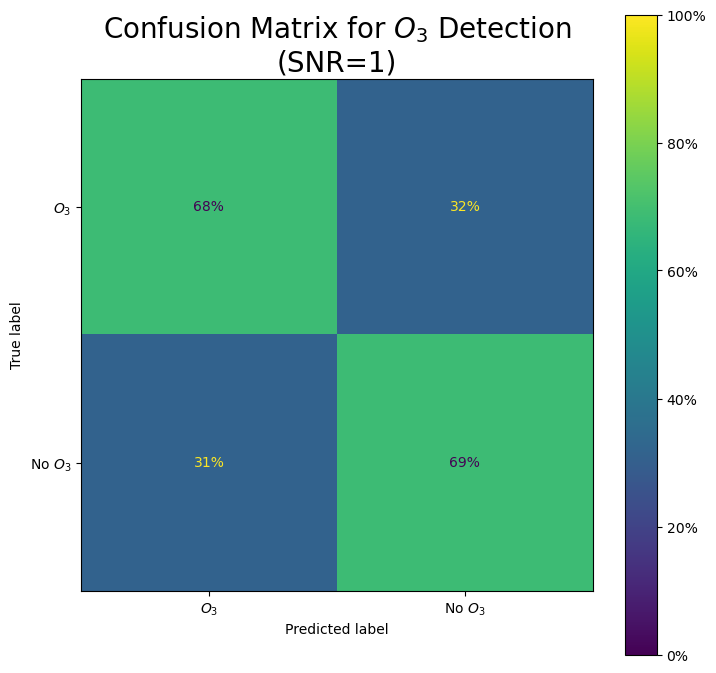

In [17]:
remove_warnings()
SNRval_all_probabilities = all_SNR_rf.predict_proba(SNRval_all_X_test)[:, 1]
threshold = 0.34
SNRval_all_y_pred = (SNRval_all_probabilities > threshold).astype(int)
SNRval_all_test["pred"] = SNRval_all_y_pred
SNRval_all_test["score"] = SNRval_all_probabilities

print(confusion_matrix(SNRval_all_y_test, SNRval_all_y_pred))
print(classification_report(SNRval_all_y_test, SNRval_all_y_pred))

plot_confusion_matrix(
    SNRval_all_y_test, SNRval_all_y_pred,
    labels=[1,0], display_labels=["$O_3$", "No $O_3$"],
    title=f"Confusion Matrix for $O_3$ Detection\n(SNR={SNR})"
)

label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
label
1    3000
0    3000
Name: count, dtype: int64
mix ratio:O3=1e-10
[[2079  921]
 [2080  920]]
mean score of :O3=1e-10 is 0.3145340593598438
mix ratio:O3=1e-09
[[2052  948]
 [2073  927]]
mean score of :O3=1e-09 is 0.31545815753588724
mix ratio:O3=1e-08
[[2073  927]
 [1984 1016]]
mean score of :O3=1e-08 is 0.3203044665103415
mix ratio:O3=1e-07
[[2048  952]
 [1612 1388]]
mean score of :O3=1e-07 is 0.3399250572001707
mix ratio:O3=1e-06
[[2072  928]
 [1006 1994]]
mean score of :O3=1e-06 is 0.3774869579514304
mix ratio:O3=1e-05


Text(0.5, 1.0, 'Scores for $O_3$ Detection\n(SNR=1)')

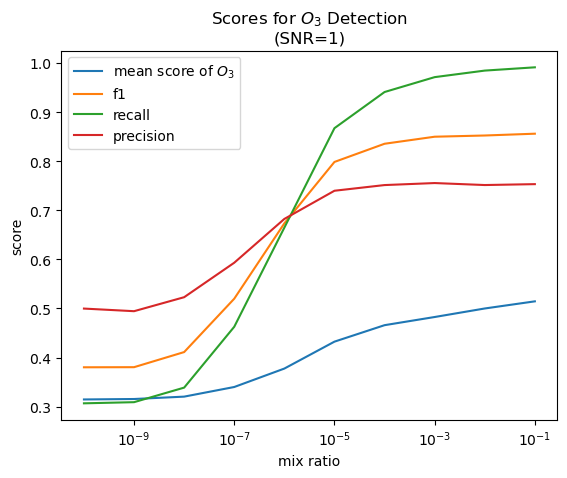

In [18]:
SNRval_all_test_by_atmO3=[[] for i in range(10)]

for i, j in enumerate(range(-10,-0)):
    SNRval_all_test_by_atmO3[i]=SNRval_all_test[SNRval_all_test["atm O3"]==j]
    co2=int(len(SNRval_all_test[SNRval_all_test["label"]==0])/10)
    SNRval_all_test_by_atmO3[i]=pd.concat([SNRval_all_test_by_atmO3[i],
                                      SNRval_all_test[SNRval_all_test["label"]==0][i*co2:(i+1)*co2]])
    print(SNRval_all_test_by_atmO3[i]["label"].value_counts())
    
SNRval_all_f1 = np.zeros(len(mix_ratios))
SNRval_all_recall = np.zeros(len(mix_ratios))
SNRval_all_precision = np.zeros(len(mix_ratios))
SNRval_all_score = np.zeros(len(mix_ratios))

for j in range(len(mix_ratios)):
                    
                    SNRval_all_f1[j] = f1_score(
                        SNRval_all_test_by_atmO3[j]["label"].astype(int),
                        SNRval_all_test_by_atmO3[j]["pred"].astype(int)
                        )
                    
                    SNRval_all_recall[j] = recall_score(
                        SNRval_all_test_by_atmO3[j]["label"].astype(int),
                        SNRval_all_test_by_atmO3[j]["pred"].astype(int)
                        )
                    
                    SNRval_all_precision[j]=precision_score(
                        SNRval_all_test_by_atmO3[j]["label"].astype(int),
                        SNRval_all_test_by_atmO3[j]["pred"].astype(int)
                        )
                    
                    print(f"mix ratio:O3={mix_ratios[j]}")
                    print(confusion_matrix(SNRval_all_test_by_atmO3[j]["label"].astype(int),
                                        SNRval_all_test_by_atmO3[j]["pred"].astype(int)))
                    
                    print(f"mean score of :O3={mix_ratios[j ]} is {SNRval_all_test_by_atmO3[j][SNRval_all_test_by_atmO3[j]['label']==1]['score'].mean()}")
                    SNRval_all_score[j] = SNRval_all_test_by_atmO3[j][
                        SNRval_all_test_by_atmO3[j]['label']==1
                        ]['score'].mean()
                    
plt.figure()
plt.plot(mix_ratios,SNRval_all_score,label="mean score of $O_3$")
plt.plot(mix_ratios,SNRval_all_f1,label="f1")
plt.plot(mix_ratios,SNRval_all_recall,label="recall")
plt.plot(mix_ratios,SNRval_all_precision,label="precision")

plt.xlabel("mix ratio")
plt.xscale("log")
plt.ylabel("score")

plt.legend()
plt.title(f"Scores for $O_3$ Detection\n(SNR={SNR})")